# 워드클라우드

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
!pip install konlpy > /dev/null

In [33]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving car_blog.txt to car_blog.txt


In [122]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving daimler-146887_640.png to daimler-146887_640.png


## 한글 텍스트 전처리

In [34]:
with open(textfile) as fp:
  text = fp.read()

In [35]:
from konlpy.tag import Okt
okt = Okt()

In [36]:
tokens = okt.nouns(text)
tokens[:10]

['현대', '자동차', '부산', '텀', '오토', '스퀘어', '자동차', '사진', '모음', '김해']

In [37]:
# 영문 숫자 제거
import re
new_tokens = []
for token in tokens:
  game = re.sub('[A-Za-z0-9]', '', token)
  if game:
    new_tokens.append(game)

In [10]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

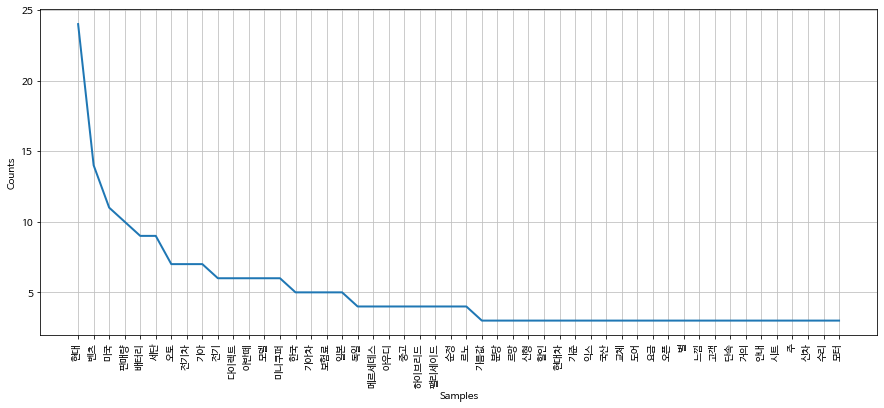

In [81]:
gift = nltk.Text(new_tokens, name='추천')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [80]:
stoptext = """
  자동차 전 차량 것 가입 오늘 분 이번 순위 차 검사 가장 시장 시동 제 추천 장단점 구매 등록 대해 사진 중
  전용 회사 방법 가격 정보 카 좀 차종 수 관련 튠 를 요 사용 카페 출처 앞 말 견적 하나 비교 의 키
  전문 구입 다에릭트 문제 정도 저 가지 번 출시 출고 일정 이름 바로 자금 거리 세차 고급 세계 어제 도로 진행
  장기 등 이용 더 소개 명의 이 모든 속 공유 제품 친구 담보 대출 부산 위 생각 지금 생산 수입 판매 튠 대한 기함
  한번 때문 스퀘어 위치 포스팅 주행 최근 및 개인 이동 활용 내 만 조사 덴트 처음 정리 로 해 경우 승 후기
  라인 벌금 스피커 방문 차선 속도 캠핑 점유 율 용품 거제 형태 사실 분석 국내 편 왜 운행 최고 피해 보장 또한 동해 본인
  부품 운전 갑자기 겅우 제거 도장 방식 개 사이트 기간 가능 물때 륜 현재 무 물 아버지 통해 위해 직접  준비
  전체
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['현대', '텀', '오토', '모음', '김해', '포유', '공개', '현대', '텀', '오토']

In [29]:
from wordcloud import WordCloud
from PIL import Image

In [126]:
data = gift.vocab().most_common(400)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

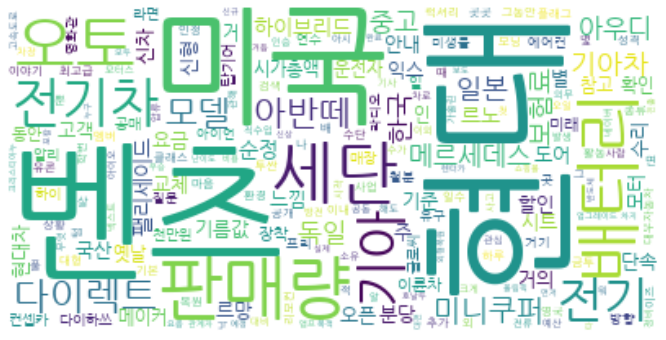

In [127]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

-그림위에 표시

In [129]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [130]:
wc = WordCloud(
    font_path=path, relative_scaling=0.2,
    background_color='white', mask=mask,
    min_font_size=1, max_words=120
).generate_from_frequencies(dict(data))

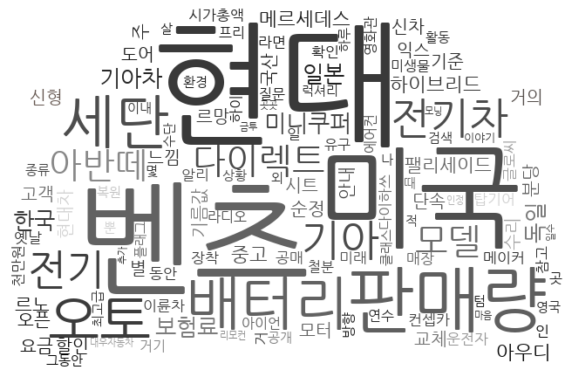

In [131]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors),
           interpolation='bilinear')
plt.axis('off')
plt.show()